In [149]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [150]:
#Load data:
train = pd.read_excel('Train_nyOWmfK.xlsx')
test = pd.read_excel('Test_bCtAN1w.xlsx')

In [151]:
#Let's look at the shapes
print("Shape of train: {}".format(train.shape),"\nShape of test: {}".format(test.shape))

Shape of train: (87020, 26) 
Shape of test: (37717, 24)


In [152]:
#Let's look for different data types 
print("Data Types for Train: {}\n".format(train.dtypes))
print("\nData Types for Test: {}".format(test.dtypes))

Data Types for Train: ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object


Data Types for Test: ID                        object
Gender                    object
City             

In [153]:
train.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [154]:
test.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4
0,ID000026A10,Male,Dehradun,21500,03-Apr-87,05-May-15,100000.0,3.0,0.0,APTARA INC,...,100000.0,3.0,20.0,1000.0,2649.39,N,Web-browser,B,S122,3
1,ID000054C40,Male,Mumbai,42000,12-May-80,01-May-15,0.0,0.0,0.0,ATUL LTD,...,690000.0,5.0,24.0,13800.0,19849.90,Y,Mobile,C,S133,5
2,ID000066O10,Female,Jaipur,10000,19-Sep-89,01-May-15,300000.0,2.0,0.0,SHAREKHAN PVT LTD,...,NaN,NaN,NaN,NaN,NaN,N,Web-browser,B,S133,1
3,ID000110G00,Female,Chennai,14650,15-Aug-91,01-May-15,0.0,0.0,0.0,MAERSK GLOBAL SERVICE CENTRES,...,NaN,NaN,NaN,NaN,NaN,N,Mobile,C,S133,1
4,ID000113J30,Male,Chennai,23400,22-Jul-87,01-May-15,100000.0,1.0,5000.0,SCHAWK,...,100000.0,2.0,NaN,NaN,NaN,N,Web-browser,B,S143,1


Ab aisa kiya jaae kyuki train and test ka alag alag se data pre-processing mein bhot mehnat h isiliye humlog dono dataframes ko concat kar dete h.

Translation: Since pre-processing the data separately will be very time consuming that's why we're concatenating train and test datasets.

In [155]:
#Combine into data
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
data.shape

(124737, 27)

Check for Missing values : Kyuki puraani values ka ab achaar daalenge kya ?
(Translation: We'll check for missing values and remove them cause we don't have to make a pickle of misinng values)

In [156]:
data.apply(lambda x: sum(x.isnull()))

ID                           0
Gender                       0
City                      1401
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Tenure_Applied        111
Existing_EMI               111
Employer_Name              113
Salary_Account           16801
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    49535
Loan_Tenure_Submitted    49535
Interest_Rate            84901
Processing_Fee           85346
EMI_Loan_Submitted       84901
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
LoggedIn                 37717
Disbursed                37717
source                       0
dtype: int64

Now let's look at the categories of all object variables.

In [157]:
var = ['Gender', 'Salary_Account', 'Var1', 'Filled_Form', 'Device_Type', 'Var2', 'Source']
for v in var:
    print('Frequency count of variable %s'%v)
    print(data[v].value_counts())

Frequency count of variable Gender
Male      71398
Female    53339
Name: Gender, dtype: int64
Frequency count of variable Salary_Account
HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                                            996
Corporat

Handling of Individual Variables

In [158]:
#City Variable
print("Number of uniques values in city variable = {}".format(len(data['City'].unique())))
#Now since there are too many uniques values we'll have to drop this variable
#Now question arises is why ???? 
#One thing to understand here is that that the large number of unique values will only lead to non-convergence of our ML Algorithm
data.drop('City', axis=1, inplace = True)

Number of uniques values in city variable = 724


In [159]:
#Determination of age from DOB.
data['DOB'].head()

0    23-May-78
1    07-Oct-85
2    10-Oct-81
3    30-Nov-87
4    17-Feb-84
Name: DOB, dtype: object

In [160]:
#Creation of Age Variable
data['Age'] = data['DOB'].apply(lambda x: 122 - int(x[-2:]))
data['Age'].head()
#Yahan logic ye h ki 1900 to 2022 is 122 so maine bas 122 se minus kar ke age nikal di h 
#DRop DOB
data.drop('DOB', axis=1, inplace=True)

<AxesSubplot:>

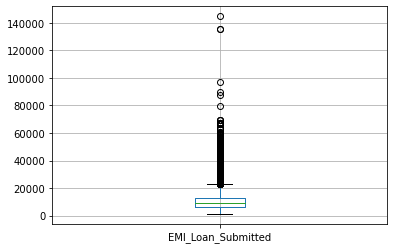

In [161]:
data.boxplot(column=['EMI_Loan_Submitted'], return_type='axes')

In [162]:
#NOw since the majority values are missing so we'll create a new variable stating whether a particular value is missing or not.
data['EMI_Loan_Submitted_Missing'] = data['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted', 'EMI_Loan_Submitted_Missing']].head(10)

,EMI_Loan_Submitted,EMI_Loan_Submitted_Missing
0,NaN,1
1,6762.90,0
2,NaN,1
3,NaN,1
4,NaN,1
5,6978.92,0
6,NaN,1
7,NaN,1
8,30824.65,0
9,10883.38,0


In [163]:
#Now the thing to understand is that since we need the data of scenario wherein loan was submitted or not so we'll drop original variable
data.drop('EMI_Loan_Submitted', axis=1, inplace=True)

In [164]:
data.head()

,ID,Gender,Monthly_Income,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,...,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,source,Age,EMI_Loan_Submitted_Missing
0,ID000002C20,Female,20000,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,...,N,Web-browser,G,S122,1,0.0,0.0,train,44,1
1,ID000004E40,Male,35000,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,Y,...,N,Web-browser,G,S122,3,0.0,0.0,train,37,0
2,ID000007H20,Male,22500,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,Y,...,N,Web-browser,B,S143,1,0.0,0.0,train,41,1
3,ID000008I30,Male,35000,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,Y,...,N,Web-browser,B,S143,3,0.0,0.0,train,35,1
4,ID000009J40,Male,100000,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,Y,...,N,Web-browser,B,S134,3,1.0,0.0,train,38,1


<AxesSubplot:>

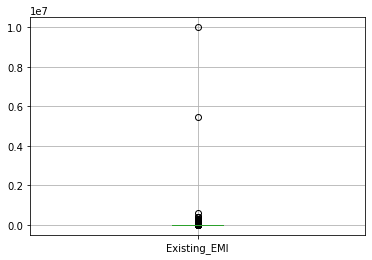

In [165]:
#Existing EMI
data.boxplot(column='Existing_EMI', return_type='axes')

In [166]:
data['Existing_EMI'].describe()

count    1.246260e+05
mean     3.636342e+03
std      3.369124e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

In [167]:
#Impute by median(0) because just 111 missing.
data['Existing_EMI'].fillna(0, inplace=True)

In [168]:
#Interest Rate
data['Interest_Rate_Missing'] = data['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
print(data[['Interest_Rate', 'Interest_Rate_Missing']])

        Interest_Rate  Interest_Rate_Missing
0                 NaN                      1
1               13.25                      0
2                 NaN                      1
3                 NaN                      1
4                 NaN                      1
...               ...                    ...
124732            NaN                      1
124733          31.50                      0
124734            NaN                      1
124735            NaN                      1
124736            NaN                      1

[124737 rows x 2 columns]


In [169]:
#drop the original variable
data.drop("Interest_Rate", axis=1, inplace=True)

In [170]:
#Lead Creation Date
#Dropping this variable because logically it doesn't make any sense to keep it.
data.drop("Lead_Creation_Date", axis=1, inplace=True)

In [171]:
#Loan_Amount_Applied and Loan_Tenure_Applied.
#Impute with median because only 111 missing.

data["Loan_Amount_Applied"].fillna(data["Loan_Amount_Applied"].median(), inplace = True)
data["Loan_Tenure_Applied"].fillna(data["Loan_Tenure_Applied"].median(), inplace = True)

In [172]:
#Loan_Amount_Submitted  and Loan_Tenure_Submitted
#Since there are high number of missing values so we create a new variable which would tell us that whether a value is present or not.
data["Loan_Amount_Submitted_Missing"] = data["Loan_Amount_Submitted"].apply(lambda x: 1 if pd.isnull(x) else 0)
data["Loan_Tenure_Submitted_Missing"] = data["Loan_Tenure_Submitted"].apply(lambda x: 1 if pd.isnull(x) else 0)

In [173]:
#Dropping the older variables
data.drop(["Loan_Amount_Submitted","Loan_Tenure_Submitted"], axis = 1, inplace = True)

In [174]:
#Drop LoggedIN
data.drop("LoggedIn", axis=1, inplace=True)

In [175]:
#Drop Salary_Account cause it contains many banks which in turn will have to be grouped manually
data.drop("Salary_Account", axis =1, inplace=True)

In [176]:
#Processing_Fee
#High proportion missing to it's better to create a new variable which would tell us whether the value is missing or not
data["Processing_Fee_Missing"] = data["Processing_Fee"].apply(lambda x: 1 if pd.isnull(x) else 0)
data.drop("Processing_Fee", axis =1, inplace=True)

In [177]:
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()
#data.drop("Source", axis=1, inplace=True)

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

In [178]:
data.drop("Employer_Name", axis=1, inplace = True)
data.head()

,ID,Gender,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Mobile_Verified,Var5,Var1,Filled_Form,...,Source,Var4,Disbursed,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing
0,ID000002C20,Female,20000,300000.0,5.0,0.0,N,0,HBXX,N,...,S122,1,0.0,train,44,1,1,1,1,1
1,ID000004E40,Male,35000,200000.0,2.0,0.0,Y,13,HBXA,N,...,S122,3,0.0,train,37,0,0,0,0,1
2,ID000007H20,Male,22500,600000.0,4.0,0.0,Y,0,HBXX,N,...,others,1,0.0,train,41,1,1,0,0,1
3,ID000008I30,Male,35000,1000000.0,5.0,0.0,Y,10,HBXX,N,...,others,3,0.0,train,35,1,1,0,0,1
4,ID000009J40,Male,100000,500000.0,2.0,25000.0,Y,17,HBXX,N,...,others,3,0.0,train,38,1,1,0,0,1


In [179]:
data.apply(lambda x: sum(x.isnull()))

ID                                   0
Gender                               0
Monthly_Income                       0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Existing_EMI                         0
Mobile_Verified                      0
Var5                                 0
Var1                                 0
Filled_Form                          0
Device_Type                          0
Var2                                 0
Source                               0
Var4                                 0
Disbursed                        37717
source                               0
Age                                  0
EMI_Loan_Submitted_Missing           0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [180]:
data.dtypes

ID                                object
Gender                            object
Monthly_Income                     int64
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Existing_EMI                     float64
Mobile_Verified                   object
Var5                               int64
Var1                              object
Filled_Form                       object
Device_Type                       object
Var2                              object
Source                            object
Var4                               int64
Disbursed                        float64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

In [181]:
#Label Encoding i.e now we'll do a numerical encoding of labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

In [182]:
#Now we'll do one hot encoding 
data = pd.get_dummies(data, columns=var_to_encode)
data.columns

Index(['ID', 'Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied',
       'Existing_EMI', 'Var5', 'Var4', 'Disbursed', 'source', 'Age',
       'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Processing_Fee_Missing', 'Device_Type_0', 'Device_Type_1',
       'Filled_Form_0', 'Filled_Form_1', 'Gender_0', 'Gender_1', 'Var1_0',
       'Var1_1', 'Var1_2', 'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7',
       'Var1_8', 'Var1_9', 'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13',
       'Var1_14', 'Var1_15', 'Var1_16', 'Var1_17', 'Var1_18', 'Var2_0',
       'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4', 'Var2_5', 'Var2_6',
       'Mobile_Verified_0', 'Mobile_Verified_1', 'Source_0', 'Source_1',
       'Source_2'],
      dtype='object')

In [183]:
#Separate train and test
#Ab actual kaam karne ka waqt aa gyaa h. HO gaya bhot ab !!!
train = data.loc[data["source"]=="train"]
test = data.loc[data["source"]=="test"]


In [184]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)

/tmp/ipykernel_3638/2125576190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('source',axis=1,inplace=True)
/tmp/ipykernel_3638/2125576190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['source','Disbursed'],axis=1,inplace=True)


In [185]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)